#Classificação com Naive Bayes

Passo 1: Leitura do dataset.
Estamos utilizando a opção 

```
pd.set_option('display.max_columns',None)
```
que você já viu na aula de estatística.



In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_excel("Fonte dos Dados.xlsx")
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538.0,6.93,52.92,43.04,4.04,48.34,0.00,75.34,19.52,5.14,0.08,1.221749e+08,3382.0,643.0,27.0,0.3,2.8,18.1,0.0,0.00,36.56,0.81,4.06,0.00,0.00,0.00,6.56,18.03,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072.0,1.22,55.58,40.07,4.35,65.30,2.39,66.83,26.93,6.23,14.19,4.205170e+07,2210.0,473.0,102.0,0.3,2.5,63.2,0.0,0.17,44.09,0.77,5.44,0.00,0.00,3.29,0.00,0.00,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398.0,5.46,51.88,42.76,5.37,70.02,21.27,70.67,21.29,8.04,2.00,1.906333e+08,4839.0,1297.0,309.0,0.1,4.2,25.0,0.0,0.14,35.22,0.77,8.55,14731.75,2119542.01,0.93,9.23,6.92,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471.0,2.79,52.71,42.60,4.69,44.07,0.16,71.05,22.05,6.90,1.07,8.616439e+07,2348.0,487.0,53.0,0.4,0.5,21.0,0.0,0.00,37.61,0.77,5.52,0.00,0.00,0.00,40.00,6.67,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798.0,5.17,53.92,41.92,4.16,44.60,0.82,77.90,16.60,5.49,0.00,1.083468e+08,2539.0,327.0,37.0,0.1,0.8,16.8,0.0,0.00,35.00,0.79,5.30,0.00,93536.03,0.00,12.50,25.00,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


Como a regressão logística trabalha com dados binários, vamos construir uma coluna categórica. 
Nossa proposta vai ser configurar a Taxa de Urbanização ser maior que 65%. Se sim, a coluna receberá o valor 1, senão, receberá o valor 0.
Isso pode ser feito como vocês fizeram na aula de estatística, ou também com o comando a seguir:

In [ ]:
df.head()

In [2]:
df["Categoria Urbanização"] = pd.cut(df["Taxa de Urbanização"], bins=[0,30,60,100], labels=["até 30%","30% - 60%","60% - 100%"])

In [4]:
df[["Taxa de Urbanização", "Categoria Urbanização"]]

,Taxa de Urbanização,Categoria Urbanização
0,48.34,30% - 60%
1,65.30,60% - 100%
2,70.02,60% - 100%
3,44.07,30% - 60%
4,44.60,30% - 60%
...,...,...
5560,83.79,60% - 100%
5561,59.41,30% - 60%
5562,51.39,30% - 60%
5563,54.93,30% - 60%


In [5]:
df = df[['Porcentagem de Ativos', 'Taxa de Urbanização',
       'Taxa de Saneamento Básico', 'Ativos com Médio Nível Educacional',
       'Ativos com Alto Nível Educacional', 'IDH',
       'Percentual de trabalhadores do setor secundário em relação ao total',
       'Percentual de trabalhadores do setor terciário em relação ao total',
       'Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes',
       'Número de ativos culturais e de lazer por 10,000 habitantes',
       'Categoria Urbanização']]

In [6]:
X = df.drop(["Categoria Urbanização", "Taxa de Urbanização"],axis=1)
y = df["Categoria Urbanização"]

In [7]:
df.head()

,Porcentagem de Ativos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,IDH,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes",Categoria Urbanização
0,43.04,48.34,0.00,19.52,5.14,0.81,21.53,34.07,12.12,0.0,30% - 60%
1,40.07,65.30,2.39,26.93,6.23,0.77,0.00,36.25,17.79,0.0,60% - 100%
2,42.76,70.02,21.27,21.29,8.04,0.77,17.70,33.83,14.58,0.0,60% - 100%
3,42.60,44.07,0.16,22.05,6.90,0.77,1.04,29.40,5.78,0.0,30% - 60%
4,41.92,44.60,0.82,16.60,5.49,0.79,30.37,10.32,7.73,0.0,30% - 60%


Agora vamos separar nossa base entre base de treinamento e de teste.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB() # criando o modelo
modelo.fit(X_train, y_train) #ajustando o modelo

GaussianNB()

In [10]:
predicao_modelo = modelo.predict(X_test)

In [11]:
predicao_modelo

array(['até 30%', '60% - 100%', '60% - 100%', ..., 'até 30%', '30% - 60%',
       '60% - 100%'], dtype='<U10')

In [12]:
y_test

626      30% - 60%
4743    60% - 100%
3047     30% - 60%
3199    60% - 100%
4037    60% - 100%
           ...    
650     60% - 100%
4457       até 30%
708      30% - 60%
3332    60% - 100%
5022    60% - 100%
Name: Categoria Urbanização, Length: 1670, dtype: category
Categories (3, object): ['até 30%' < '30% - 60%' < '60% - 100%']

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicao_modelo)

0.6431137724550898

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

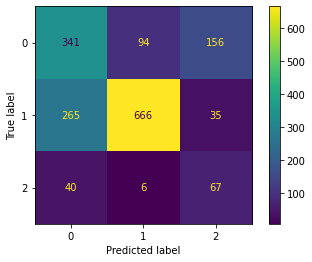

In [15]:
cm = confusion_matrix(y_test, predicao_modelo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();